# Plots Task 2

### Import librerias

In [33]:
import lithops
import pandas as pd
from io import StringIO
from pandasql import sqldf
import pandasql
from lithops import Storage
from lithops import FunctionExecutor
from pylab import *
import matplotlib.pyplot as plt
from lithops.multiprocessing import Pool
from config_file import config
import sqlalchemy
import main

In [34]:
fexec = lithops.FunctionExecutor(runtime='meszon/lithops-custom-runtimev38:0.1', runtime_memory=2048)

2021-06-15 21:13:00,404 [INFO] lithops.config -- Lithops v2.3.3
2021-06-15 21:13:00,413 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-06-15 21:13:00,414 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-gb - Namespace: raul.mesa@estudiants.urv.cat_dev
2021-06-15 21:13:00,414 [INFO] lithops.executors -- Serverless Executor created with ID: c4a1a0-6


### Funciones auxiliares

In [35]:
def formatar(query):
    query = query.str.replace('00:00:00.000000','',regex=True)
    query = query.str.replace('2020','20',regex=True)
    query = query.str.replace('2021','21',regex=True)
    return query

In [36]:
def graph_plot(query, x, y):
    fig, ax = plt.subplots(figsize=(16, 7))
    query[x] = formatar(query[x])
    ax.plot(query[x], query[y])
    plt.show()

In [37]:
def getData(select):
    storage = Storage()
    #data = storage.get_object('task2-sd', objectCSV_1)
    data = storage.get_object('task2-sd', 'database.csv')

    format_data = str(data[0:-1], 'utf-8')
    database = pd.read_csv(StringIO(format_data))

    database["TipusCasData"]= pd.to_datetime(database["TipusCasData"])
    database = database.sort_values(by="TipusCasData")
    query = sqldf(select)

    return query

In [38]:
def graph_plot_multiline(query1, x1, y1, label1, query2, x2, y2, label2):
    fig, ax = plt.subplots(figsize=(16, 7))
    query1[x1] = formatar(query1[x1])
    ax.plot(query1[x1], query1[y1], label = label1)
    query2[x2] = formatar(query2[x2])
    ax.plot(query2[x2], query2[y2], label = label2)
    plt.legend()
    plt.show()

### Query 1: consulta n casos por tiempo en la comarca del Tarragones

In [39]:
fexec.call_async(getData, "SELECT NumCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' GROUP BY TipusCasData", runtime_memory=2048)
query = fexec.get_result()

2021-06-15 21:13:06,073 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A000 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-15 21:13:06,078 [INFO] lithops.job.job -- ExecutorID c4a1a0-6 | JobID A000 - Uploading function and data - Total: 1.0KiB
2021-06-15 21:13:07,165 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A000 - Starting function invocation: getData() - Total: 1 activations
2021-06-15 21:13:07,166 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A000 - View execution logs at /tmp/lithops/logs/c4a1a0-6-A000.log
2021-06-15 21:13:07,168 [INFO] lithops.wait -- ExecutorID c4a1a0-6 - Getting results from functions


    0%|          | 0/1  

2021-06-15 21:13:35,302 [INFO] lithops.executors -- ExecutorID c4a1a0-6 - Cleaning temporary data


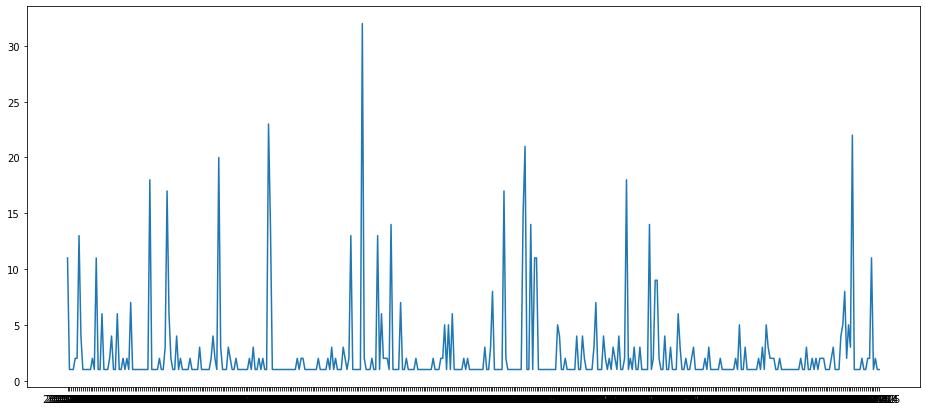

In [40]:
query['TipusCasData'] = formatar(query['TipusCasData'])
graph_plot(query, 'TipusCasData', 'NumCasos')

### Query 2: consulta n. casos por comarca A-L

In [41]:
fexec.call_async(getData, "SELECT SUM(NumCasos) AS TotalCasos, ComarcaDescripcio FROM database WHERE ComarcaDescripcio < 'L%'  GROUP BY ComarcaDescripcio", runtime_memory=2048)
query = fexec.get_result()

2021-06-15 21:13:39,865 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A001 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-15 21:13:39,867 [INFO] lithops.job.job -- ExecutorID c4a1a0-6 | JobID A001 - Uploading function and data - Total: 1.1KiB
2021-06-15 21:13:40,047 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A001 - Starting function invocation: getData() - Total: 1 activations
2021-06-15 21:13:40,048 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A001 - View execution logs at /tmp/lithops/logs/c4a1a0-6-A001.log
2021-06-15 21:13:40,050 [INFO] lithops.wait -- ExecutorID c4a1a0-6 - Getting results from functions


    0%|          | 0/2  

2021-06-15 21:13:47,142 [INFO] lithops.executors -- ExecutorID c4a1a0-6 - Cleaning temporary data


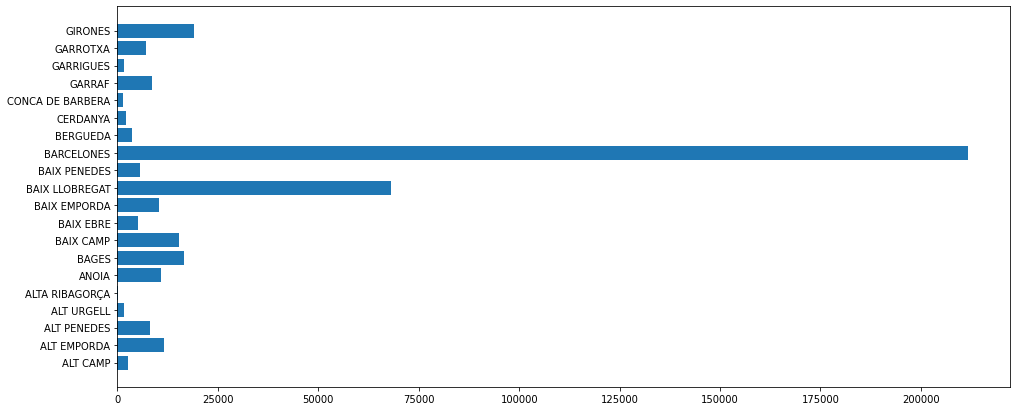

In [42]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.barh(query['ComarcaDescripcio'], query['TotalCasos'])
plt.show()

### Query 3: consulta n. casos por comarca M-Z

In [43]:
fexec.call_async(getData, "SELECT SUM(NumCasos) AS TotalCasos, ComarcaDescripcio FROM database WHERE ComarcaDescripcio >= 'L%'  GROUP BY ComarcaDescripcio", runtime_memory=2048)
query = fexec.get_result()

2021-06-15 21:13:49,012 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A002 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-15 21:13:49,015 [INFO] lithops.job.job -- ExecutorID c4a1a0-6 | JobID A002 - Uploading function and data - Total: 1.1KiB
2021-06-15 21:13:49,213 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A002 - Starting function invocation: getData() - Total: 1 activations
2021-06-15 21:13:49,215 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A002 - View execution logs at /tmp/lithops/logs/c4a1a0-6-A002.log
2021-06-15 21:13:49,217 [INFO] lithops.wait -- ExecutorID c4a1a0-6 - Getting results from functions


    0%|          | 0/3  

2021-06-15 21:13:56,306 [INFO] lithops.executors -- ExecutorID c4a1a0-6 - Cleaning temporary data


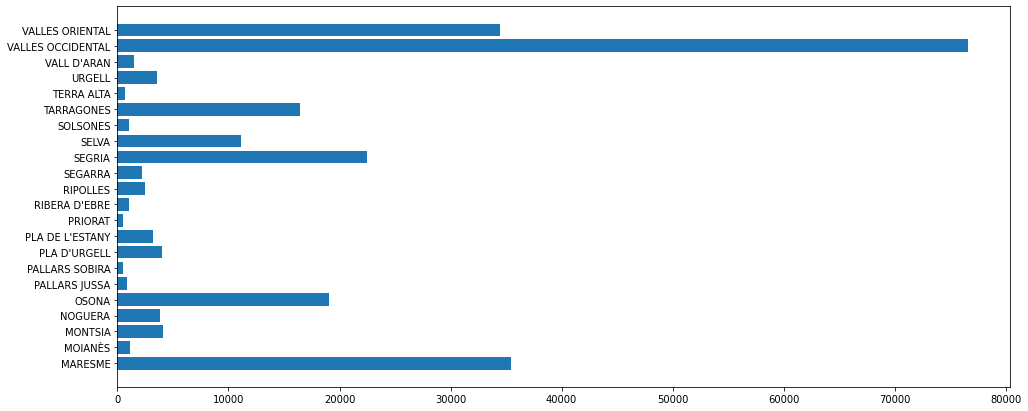

In [44]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.barh(query['ComarcaDescripcio'], query['TotalCasos'])
plt.show()

### Query 4: consulta n. casos en un mes de todas las comarcas

In [45]:
fexec.call_async(getData, "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE TipusCasData BETWEEN '2020-01-01' AND '2020-02-01' GROUP BY TipusCasData", runtime_memory=2048)
query = fexec.get_result()

2021-06-15 21:13:59,861 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A003 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-15 21:13:59,863 [INFO] lithops.job.job -- ExecutorID c4a1a0-6 | JobID A003 - Uploading function and data - Total: 1.1KiB
2021-06-15 21:14:00,042 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A003 - Starting function invocation: getData() - Total: 1 activations
2021-06-15 21:14:00,043 [INFO] lithops.invokers -- ExecutorID c4a1a0-6 | JobID A003 - View execution logs at /tmp/lithops/logs/c4a1a0-6-A003.log
2021-06-15 21:14:00,046 [INFO] lithops.wait -- ExecutorID c4a1a0-6 - Getting results from functions


    0%|          | 0/4  

2021-06-15 21:14:08,131 [INFO] lithops.executors -- ExecutorID c4a1a0-6 - Cleaning temporary data


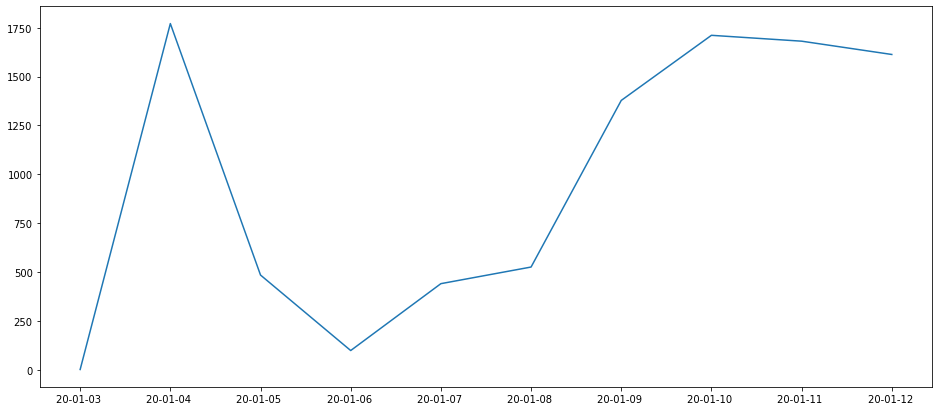

In [46]:
query['TipusCasData'] = formatar(query['TipusCasData'])
graph_plot(query, 'TipusCasData', 'TotalCasos')

### Query 5: consulta paralelizadas de n. casos de la comarca del Tarragones

In [47]:
query = Pool().map(getData, [
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-01-01' AND '2020-03-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-03-01' AND '2020-05-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-05-01' AND '2020-07-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-07-01' AND '2020-09-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-09-01' AND '2020-11-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-11-01' AND '2021-01-01' GROUP BY TipusCasData"
    ])

2021-06-15 21:14:11,402 [INFO] lithops.config -- Lithops v2.3.3
2021-06-15 21:14:11,411 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-06-15 21:14:11,411 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-gb - Namespace: raul.mesa@estudiants.urv.cat_dev
2021-06-15 21:14:11,412 [INFO] lithops.executors -- Serverless Executor created with ID: c4a1a0-7
2021-06-15 21:14:11,414 [INFO] lithops.invokers -- ExecutorID c4a1a0-7 | JobID M000 - Selected Runtime: lithopscloud/ibmcf-python-v38 - 256MB
2021-06-15 21:14:11,417 [INFO] lithops.job.job -- ExecutorID c4a1a0-7 | JobID M000 - Uploading function and data - Total: 2.3KiB
2021-06-15 21:14:12,174 [INFO] lithops.invokers -- ExecutorID c4a1a0-7 | JobID M000 - Starting function invocation: None() - Total: 6 activations
2021-06-15 21:14:12,178 [INFO] lithops.invokers -- ExecutorID c4a1a0-7 | JobID M000 - View execution logs at /tmp/lithops/logs/c4a1a0-7-M00

    0%|          | 0/6  

2021-06-15 21:14:15,222 [WARNING] lithops.future -- ExecutorID c4a1a0-7 | JobID M000 - There was an exception - Activation ID: 67148b9cc4f0443d948b9cc4f0b43ddd
2021-06-15 21:14:15,222 [WARNING] lithops.future -- ExecutorID c4a1a0-7 | JobID M000 - There was an exception - Activation ID: 184e87a07057418d8e87a07057018d1e
2021-06-15 21:14:15,224 [WARNING] lithops.future -- ExecutorID c4a1a0-7 | JobID M000 - There was an exception - Activation ID: 6248d34746aa443388d34746aa243365
2021-06-15 21:14:15,226 [WARNING] lithops.future -- Exception: ModuleNotFoundError - No module named 'pandasql'
2021-06-15 21:14:15,224 [WARNING] lithops.future -- ExecutorID c4a1a0-7 | JobID M000 - There was an exception - Activation ID: 59998ba7e6814a64998ba7e681fa6437
2021-06-15 21:14:15,224 [WARNING] lithops.future -- ExecutorID c4a1a0-7 | JobID M000 - There was an exception - Activation ID: 6e75ac1c3c9542f7b5ac1c3c9562f7d2
2021-06-15 21:14:15,225 [WARNING] lithops.future -- Exception: ModuleNotFoundError - No 

Exception: Unable to get the result from call 00000 - Activation ID: 59998ba7e6814a64998ba7e681fa6437

In [ ]:
for q in query:
        graph_plot(q, 'TipusCasData', 'TotalCasos')

### Query 6: consulta número de alta diarias y defunciones diarias durante el año 2020

In [17]:
query = Pool().map(getData, [
    "SELECT DISTINCT TipusCasData, AltesDiaries FROM database WHERE AltesDiaries IS NOT NULL",
    "SELECT DISTINCT TipusCasData, DefuncionsDiaries FROM database WHERE AltesDiaries IS NOT NULL"
])

2021-06-14 18:18:48,685 [INFO] lithops.config -- Lithops v2.3.3
2021-06-14 18:18:48,685 [INFO] lithops.storage.backends.localhost.localhost -- Localhost Storage client created
2021-06-14 18:18:48,686 [INFO] lithops.localhost.localhost -- Localhost compute client created
2021-06-14 18:18:48,687 [INFO] lithops.executors -- Localhost Executor created with ID: db737e-2
2021-06-14 18:18:48,687 [INFO] lithops.invokers -- ExecutorID db737e-2 | JobID M000 - Selected Runtime: python3 
2021-06-14 18:18:48,692 [INFO] lithops.job.job -- ExecutorID db737e-2 | JobID M000 - Uploading function and data - Total: 1.7KiB
2021-06-14 18:18:48,692 [INFO] lithops.invokers -- ExecutorID db737e-2 | JobID M000 - Starting function invocation: None() - Total: 2 activations
2021-06-14 18:18:48,696 [INFO] lithops.invokers -- ExecutorID db737e-2 | JobID M000 - View execution logs at /tmp/lithops/logs/db737e-2-M000.log
2021-06-14 18:18:48,697 [INFO] lithops.wait -- ExecutorID db737e-2 - Waiting for functions to compl

    0%|          | 0/2  

2021-06-14 18:18:54,747 [INFO] lithops.wait -- ExecutorID db737e-2 - Getting results from functions


    0%|          | 0/2  

2021-06-14 18:18:54,767 [INFO] lithops.executors -- ExecutorID db737e-2 - Cleaning temporary data


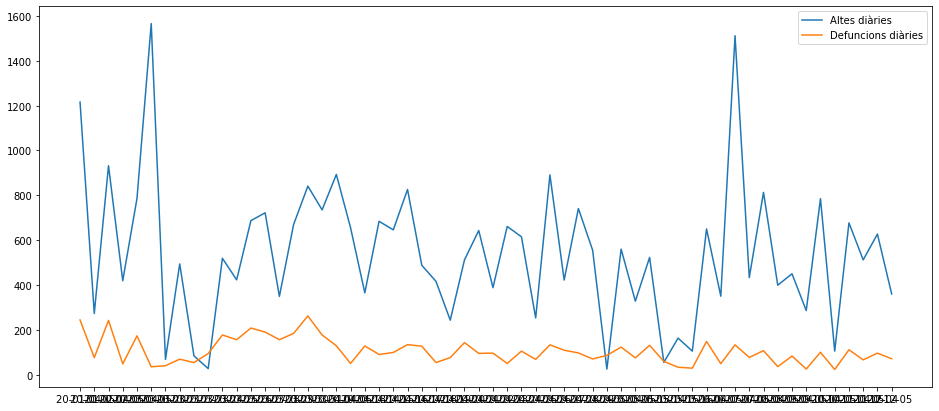

In [18]:
graph_plot_multiline(query[0], 'TipusCasData', 'AltesDiaries', 'Altes diàries', query[1], 'TipusCasData', 'DefuncionsDiaries', 'Defuncions diàries')